In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from textwrap import wrap

In [2]:
df = pd.read_csv("D:\Downloads\online.csv")
df

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom
...,...,...,...,...,...,...,...,...,...
70859,448575,575063,22804,PINK HANGING HEART T-LIGHT HOLDER,1,2011-11-08 12:32:00,2.95,16764,United Kingdom
70860,19970,537963,21733,RED HANGING HEART T-LIGHT HOLDER,12,2010-12-09 11:30:00,2.95,13369,United Kingdom
70861,264154,560089,23238,SET OF 4 KNICK KNACK TINS LONDON,1,2011-07-14 16:45:00,4.15,12748,United Kingdom
70862,199822,554103,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2,2011-05-22 13:51:00,2.95,15555,United Kingdom


In [3]:
df.isnull().values.sum()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70864 entries, 0 to 70863
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   70864 non-null  int64  
 1   InvoiceNo    70864 non-null  int64  
 2   StockCode    70864 non-null  object 
 3   Description  70864 non-null  object 
 4   Quantity     70864 non-null  int64  
 5   InvoiceDate  70864 non-null  object 
 6   UnitPrice    70864 non-null  float64
 7   CustomerID   70864 non-null  int64  
 8   Country      70864 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 4.9+ MB


In [4]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [5]:
import datetime as dt
def get_month(x):
    return dt.datetime(x.year,x.month,1)
df['InvoiceMonth']=df["InvoiceDate"].apply(get_month)
df.tail()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
70859,448575,575063,22804,PINK HANGING HEART T-LIGHT HOLDER,1,2011-11-08 12:32:00,2.95,16764,United Kingdom,2011-11-01
70860,19970,537963,21733,RED HANGING HEART T-LIGHT HOLDER,12,2010-12-09 11:30:00,2.95,13369,United Kingdom,2010-12-01
70861,264154,560089,23238,SET OF 4 KNICK KNACK TINS LONDON,1,2011-07-14 16:45:00,4.15,12748,United Kingdom,2011-07-01
70862,199822,554103,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2,2011-05-22 13:51:00,2.95,15555,United Kingdom,2011-05-01
70863,312243,564342,22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,2,2011-08-24 14:53:00,2.95,16340,United Kingdom,2011-08-01


In [12]:
df['Cohort Month'] =  df.groupby('CustomerID')['InvoiceMonth'].transform('min')
df.head(30)

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Cohort Month
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01
5,125615,547051,22028,PENNY FARTHING BIRTHDAY CARD,12,2011-03-20 12:06:00,0.42,12902,United Kingdom,2011-03-01,2011-03-01
6,483123,577493,20724,RED RETROSPOT CHARLOTTE BAG,10,2011-11-20 12:13:00,0.85,17323,United Kingdom,2011-11-01,2011-02-01
7,449888,575143,23343,JUMBO BAG VINTAGE CHRISTMAS,10,2011-11-08 15:37:00,2.08,13643,United Kingdom,2011-11-01,2011-09-01
8,127438,547223,22934,BAKING MOULD EASTER EGG WHITE CHOC,2,2011-03-21 15:10:00,2.95,12867,United Kingdom,2011-03-01,2010-12-01
9,189515,553156,21212,PACK OF 72 RETROSPOT CAKE CASES,2,2011-05-13 14:58:00,0.55,17841,United Kingdom,2011-05-01,2010-12-01


In [24]:
def get_date_elements(df,column):
    day= df[column].dt.day
    month = df[column].dt.month
    year = df[column].dt.year
    return day,month,year

In [25]:
_,Invoice_month,Invoice_year =  get_date_elements(df,'InvoiceMonth')
_,Cohort_month,Cohort_year =  get_date_elements(df,'Cohort Month')

In [28]:
Cohort_year[:10]


0    2011
1    2011
2    2011
3    2011
4    2011
5    2011
6    2011
7    2011
8    2010
9    2010
Name: Cohort Month, dtype: int64

In [29]:
year_diff = Invoice_year -Cohort_year
month_diff = Invoice_month - Cohort_month
df['CohortIndex'] = year_diff*12+month_diff+1
df.tail()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Cohort Month,CohortIndex
70859,448575,575063,22804,PINK HANGING HEART T-LIGHT HOLDER,1,2011-11-08 12:32:00,2.95,16764,United Kingdom,2011-11-01,2011-07-01,5
70860,19970,537963,21733,RED HANGING HEART T-LIGHT HOLDER,12,2010-12-09 11:30:00,2.95,13369,United Kingdom,2010-12-01,2010-12-01,1
70861,264154,560089,23238,SET OF 4 KNICK KNACK TINS LONDON,1,2011-07-14 16:45:00,4.15,12748,United Kingdom,2011-07-01,2010-12-01,8
70862,199822,554103,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2,2011-05-22 13:51:00,2.95,15555,United Kingdom,2011-05-01,2010-12-01,6
70863,312243,564342,22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,2,2011-08-24 14:53:00,2.95,16340,United Kingdom,2011-08-01,2011-08-01,1


In [30]:
cohort_data = df.groupby(['Cohort Month','CohortIndex'])['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_data

,Cohort Month,CohortIndex,CustomerID
0,2010-12-01,1,716
1,2010-12-01,2,246
2,2010-12-01,3,221
3,2010-12-01,4,251
4,2010-12-01,5,245
...,...,...,...
86,2011-10-01,2,67
87,2011-10-01,3,30
88,2011-11-01,1,291
89,2011-11-01,2,32


In [31]:
cohort_table = cohort_data.pivot(index='Cohort Month', columns=['CohortIndex'],values='CustomerID')
cohort_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort Month,,,,,,,,,,,,,
2010-12-01,716.0,246.0,221.0,251.0,245.0,285.0,249.0,236.0,240.0,265.0,254.0,348.0,172.0
2011-01-01,332.0,69.0,82.0,81.0,110.0,90.0,82.0,86.0,104.0,102.0,124.0,45.0,NaN
2011-02-01,316.0,58.0,57.0,83.0,85.0,74.0,80.0,83.0,86.0,95.0,28.0,NaN,NaN
2011-03-01,388.0,63.0,100.0,76.0,83.0,67.0,98.0,85.0,107.0,38.0,NaN,NaN,NaN
2011-04-01,255.0,49.0,52.0,49.0,47.0,52.0,56.0,59.0,17.0,NaN,NaN,NaN,NaN
2011-05-01,249.0,40.0,43.0,36.0,52.0,58.0,61.0,22.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,207.0,33.0,26.0,41.0,49.0,62.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,173.0,28.0,31.0,38.0,44.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,139.0,30.0,28.0,35.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='CohortIndex', ylabel='Cohort Month'>

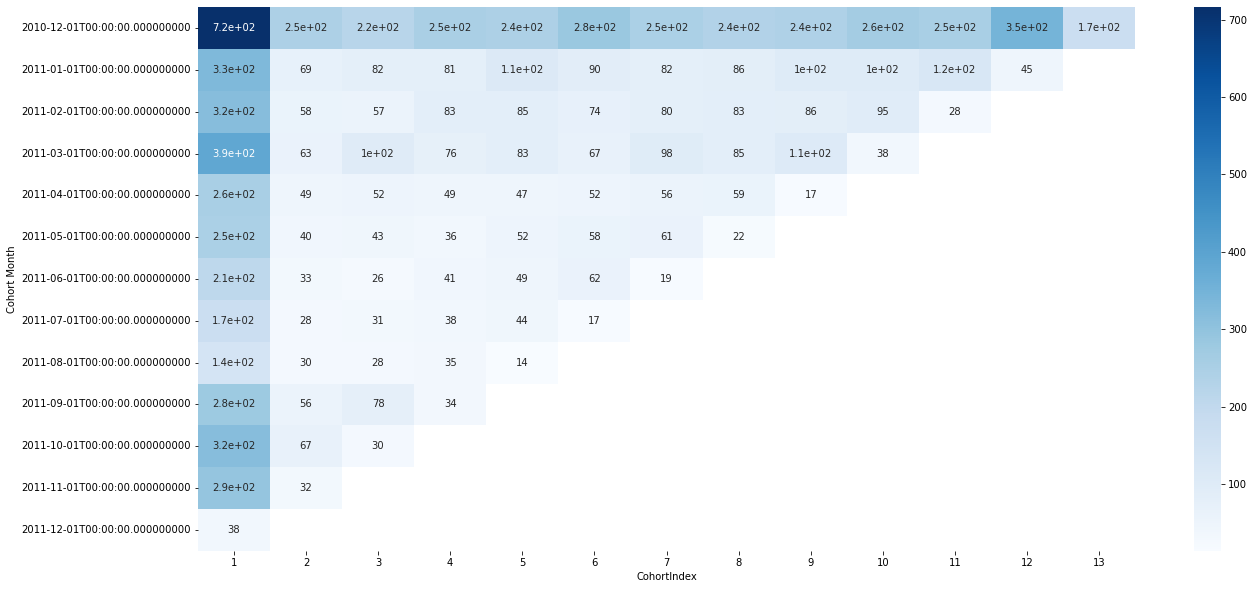

In [32]:
plt.figure(figsize=(21,10))
sns.heatmap(cohort_table,annot=True,cmap='Blues')

In [33]:
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0],axis=0)
new_cohort_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort Month,,,,,,,,,,,,,
2010-12-01,1.0,0.343575,0.308659,0.350559,0.342179,0.398045,0.347765,0.329609,0.335196,0.370112,0.354749,0.486034,0.240223
2011-01-01,1.0,0.207831,0.246988,0.243976,0.331325,0.271084,0.246988,0.259036,0.313253,0.307229,0.373494,0.135542,NaN
2011-02-01,1.0,0.183544,0.180380,0.262658,0.268987,0.234177,0.253165,0.262658,0.272152,0.300633,0.088608,NaN,NaN
2011-03-01,1.0,0.162371,0.257732,0.195876,0.213918,0.172680,0.252577,0.219072,0.275773,0.097938,NaN,NaN,NaN
2011-04-01,1.0,0.192157,0.203922,0.192157,0.184314,0.203922,0.219608,0.231373,0.066667,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.160643,0.172691,0.144578,0.208835,0.232932,0.244980,0.088353,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.159420,0.125604,0.198068,0.236715,0.299517,0.091787,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.161850,0.179191,0.219653,0.254335,0.098266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.215827,0.201439,0.251799,0.100719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='CohortIndex', ylabel='Cohort Month'>

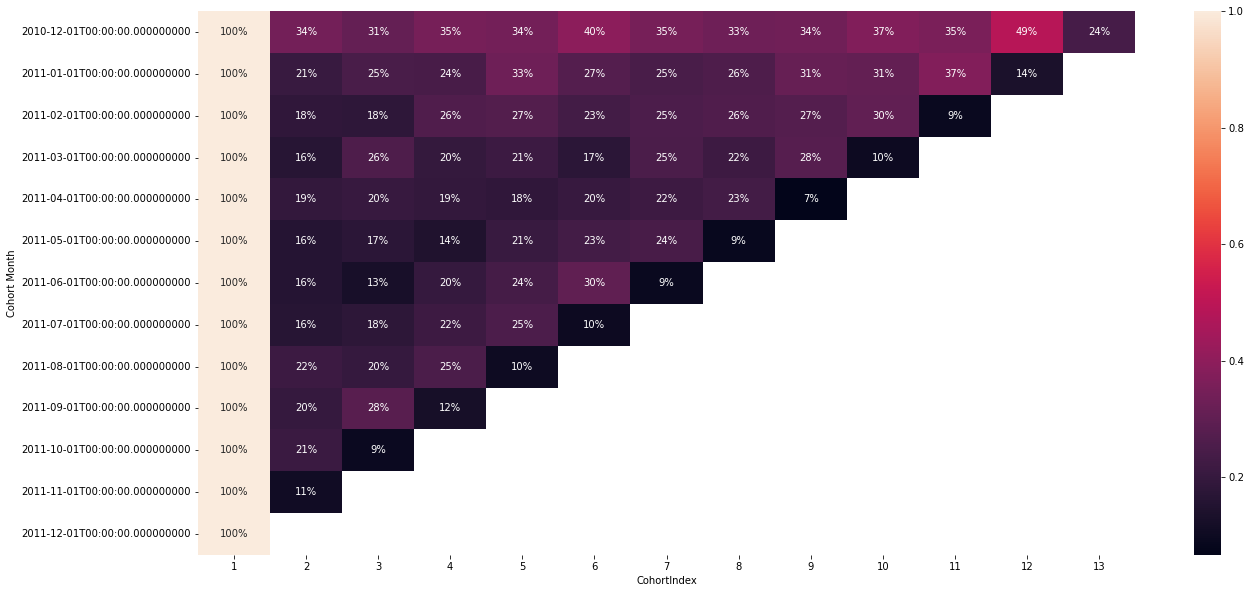

In [34]:
plt.figure(figsize=(21,10))
sns.heatmap(new_cohort_table,annot=True,fmt='.0%')